# Example queries

This notebook shows example Mastodon tooths query workflow. 

In [14]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")
db = client["Mastodon-Earthquake-Syria-Turkey"]
collection = db["toots"]

In [25]:
# Explore the structure of one toot
import pprint

one_document = collection.find_one()
pprint.pprint(one_document)

{'_id': ObjectId('65f82291e6eebd73e0c80c95'),
 'account': {'acct': 'ilivetodie@donotban.com',
             'avatar': 'https://files.mastodon.social/cache/accounts/avatars/001/298/296/original/98d28ba43cf915ec.jpeg',
             'avatar_static': 'https://files.mastodon.social/cache/accounts/avatars/001/298/296/original/98d28ba43cf915ec.jpeg',
             'bot': False,
             'created_at': datetime.datetime(2020, 10, 19, 0, 0),
             'discoverable': False,
             'display_name': '🏳️\u200d🌈一斤理想🏳️\u200d🌈',
             'emojis': [],
             'fields': [{'name': '后院',
                         'value': '<a href="https://iltds.wordpress.com/" '
                                  'rel="nofollow noopener noreferrer" '
                                  'target="_blank"><span '
                                  'class="invisible">https://</span><span '
                                  'class="">iltds.wordpress.com/</span><span '
                                  'class="i

In [28]:
# Let's explore toots that are favorited
query = {"favourites_count": {"$nin": [0, 0]}}
projection = {"content"}
favourites_count = collection.find(query, projection).limit(5)

for toot in favourites_count:
    pprint.pprint(toot, indent=1)

{'_id': ObjectId('65f82291e6eebd73e0c80c9a'),
 'content': '<p>my daughter wanted to try <a '
            'href="https://idlethumbs.social/tags/WarCry" class="mention '
            'hashtag" rel="nofollow noopener noreferrer" '
            'target="_blank">#<span>WarCry</span></a> so I let her pick some '
            'color themes and I speedpainted her these Stormcast. Will clean '
            'em up and get em to the table in a few days 🙏 </p><p><a '
            'href="https://idlethumbs.social/tags/warhammer" class="mention '
            'hashtag" rel="nofollow noopener noreferrer" '
            'target="_blank">#<span>warhammer</span></a> <a '
            'href="https://idlethumbs.social/tags/warhammercommunity" '
            'class="mention hashtag" rel="nofollow noopener noreferrer" '
            'target="_blank">#<span>warhammercommunity</span></a> <a '
            'href="https://idlethumbs.social/tags/miniaturepainting" '
            'class="mention hashtag" rel="nofollow noopen

In [30]:
# Let's see distinct users
distinct_users = collection.distinct("account.id")
print(len(distinct_users))

15321


### Time distribution 

Exploring the time distribution of toots. 

In [70]:
all_toots = []
all_toots_timestamp = collection.find(
    {},
    {"created_at": 1},
)
for toot in all_toots_timestamp:
    all_toots.append(toot.get("created_at"))

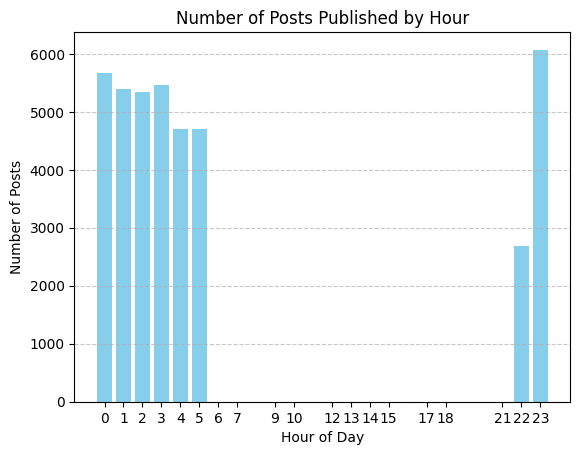

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert datetime strings to datetime objects
post_times = pd.to_datetime(all_toots)
df = pd.DataFrame({"post_time": post_times})
hourly_counts = df.groupby(df["post_time"].dt.hour).size()

# Plotting the bar chart
plt.bar(hourly_counts.index, hourly_counts.values, color="skyblue")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Posts")
plt.title("Number of Posts Published by Hour")
plt.xticks(hourly_counts.index)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

C:\Users\vrace\AppData\Local\Temp\ipykernel_1992\3013486783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['minute'] = df_filtered['post_time'].dt.strftime('%Y-%m-%d %H:%M')


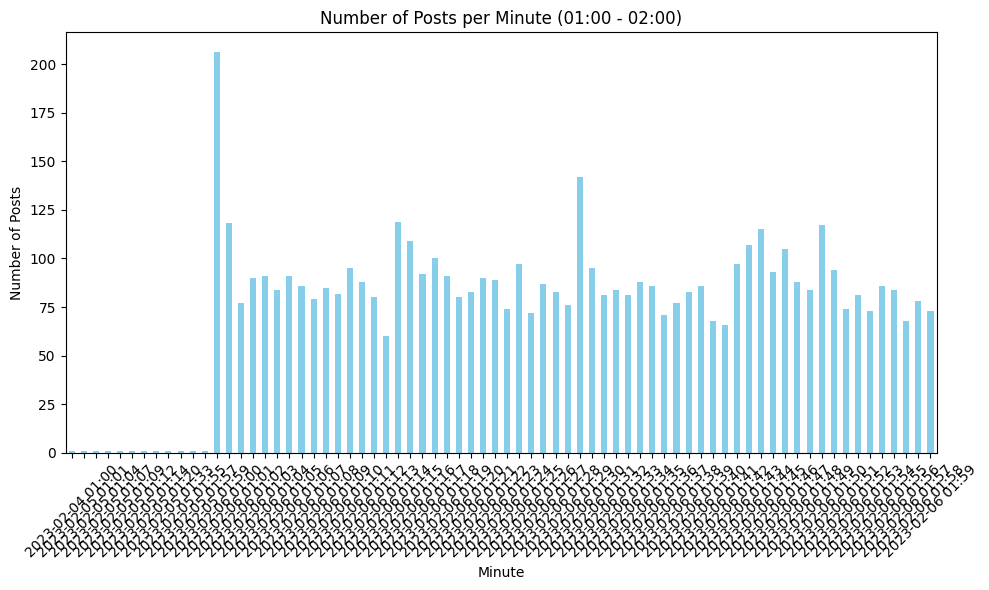

In [116]:
post_times = pd.to_datetime(all_toots)
df = pd.DataFrame({"post_time": post_times})

df["post_time"] = pd.to_datetime(df["post_time"])

# Filter data between 01:00 and 02:00
df_filtered = df[(df["post_time"].dt.hour == 1)]

# Group by minute
df_filtered["minute"] = df_filtered["post_time"].dt.strftime("%Y-%m-%d %H:%M")
grouped = df_filtered.groupby("minute").size()

# Plot
plt.figure(figsize=(10, 6))
grouped.plot(kind="bar", color="skyblue")
plt.title("Number of Posts per Minute (01:00 - 02:00)")
plt.xlabel("Minute")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vrace\AppData\Local\Temp\ipykernel_1992\1763859118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['minute'] = df_filtered['post_time'].dt.strftime('%Y-%m-%d %H:%M')


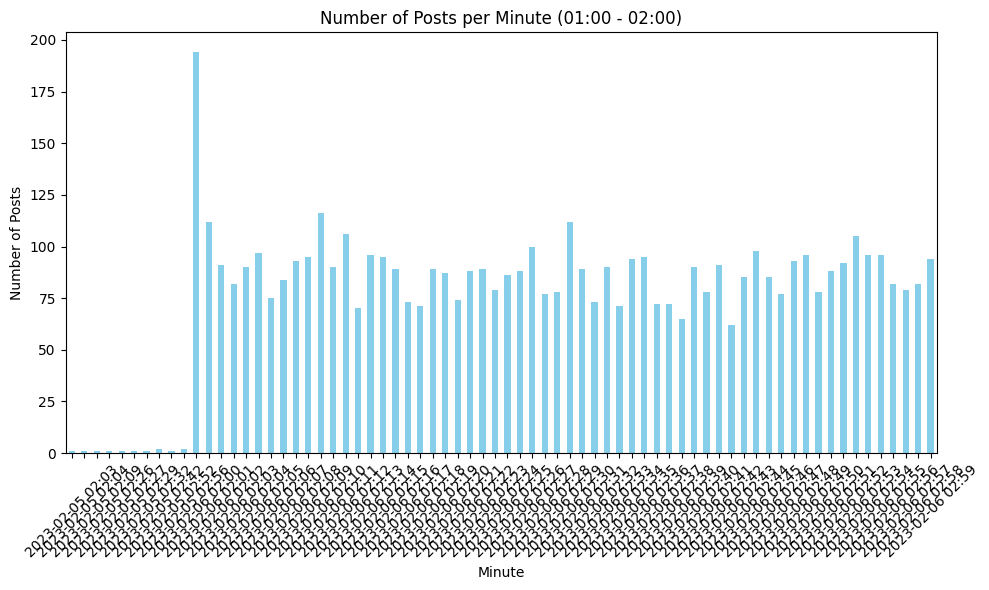

In [117]:
df["post_time"] = pd.to_datetime(df["post_time"])

# Filter data 01:00 - 02:00
df_filtered = df[(df["post_time"].dt.hour == 2)]

# Group by minute
df_filtered["minute"] = df_filtered["post_time"].dt.strftime("%Y-%m-%d %H:%M")
grouped = df_filtered.groupby("minute").size()

# Plot
plt.figure(figsize=(10, 6))
grouped.plot(kind="bar", color="skyblue")
plt.title("Number of Posts per Minute (01:00 - 02:00)")
plt.xlabel("Minute")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Filter based on a keyword



In [125]:
cursor = collection.find({}, {"created_at", "content", "language", "favorites_count"})

all_toots = list(cursor)
all_toots_df = pd.DataFrame(all_toots)
all_toots_df.head()

,_id,created_at,language,content
0,65f82291e6eebd73e0c80c95,2023-02-06 05:59:58.000,zh,<p>有时候我看问题的角度不太一样，表达上也比较强势，可能是因为亲人反目，熟人诈骗，背叛与误...
1,65f82291e6eebd73e0c80c96,2023-02-06 05:59:58.000,en,"<p>J1 GOLD: [14:59] <a href=""https://lpfm.soci..."
2,65f82291e6eebd73e0c80c97,2023-02-06 05:59:58.000,pt,<p>La bataille des retraites s’engage à l’Asse...
3,65f82291e6eebd73e0c80c98,2023-02-06 05:59:58.205,de,<p>Gleich um 07:30 Uhr schnacken wir wieder zu...
4,65f82291e6eebd73e0c80c99,2023-02-06 05:59:57.000,nl,<p>Een teleurstelling voor senioren van de eet...


In [124]:
keyword = "earthquake"

search_result = all_toots_df[all_toots_df["content"].str.contains(keyword, case=False)]
print("Rows containing the keyword in the 'content' column:")
print(search_result)

Rows containing the keyword in the 'content' column:
                            _id          created_at language  \
180    65f82293e6eebd73e0c80d49 2023-02-06 05:57:54       en   
187    65f82293e6eebd73e0c80d50 2023-02-06 05:57:48       en   
197    65f82293e6eebd73e0c80d5a 2023-02-06 05:57:44       en   
205    65f82293e6eebd73e0c80d62 2023-02-06 05:57:42       fr   
306    65f82295e6eebd73e0c80dc7 2023-02-06 05:56:35       en   
...                         ...                 ...      ...   
39602  65f8274e8b453e057b22612f 2023-02-05 22:36:31       en   
39641  65f8274e8b453e057b226156 2023-02-05 22:36:06       en   
39703  65f8274e8b453e057b226194 2023-02-05 22:35:40       en   
39759  65f8274f8b453e057b2261cc 2023-02-05 22:35:02       en   
39896  65f8275658da4149810e7e92 2023-02-05 22:33:33       en   

                                                 content  
180    <p>Notice the lights in the sky... They are fr...  
187    <p><a href="https://masto.ai/tags/Earthquake" ...  
1

In [131]:
# Calculate the percentage of posts for each language
language_counts = search_result["language"].value_counts()
total_posts = len(search_result)
language_percentages = (language_counts / total_posts) * 100

print("Percentage of posts based on language:")
print(language_percentages)

Percentage of posts based on language:
language
en       93.794326
fr        1.418440
pt        0.531915
el        0.531915
es        0.531915
sv        0.354610
tr        0.354610
en-us     0.354610
ca        0.354610
de        0.354610
ja        0.354610
ru        0.177305
da        0.177305
th        0.177305
zh        0.177305
Name: count, dtype: float64


## Extract textual content

In [142]:
import re

pattern = r"<p>(.*?)</p>"
search_result["extracted_content"] = search_result["content"].apply(
    lambda x: " ".join(re.findall(pattern, x))
)

# Print the extracted content
print("Content inside <p> tags:")
print(search_result["extracted_content"])
for item in search_result["extracted_content"]:
    print(item)

Content inside <p> tags:
180      Notice the lights in the sky... They are from ...
187      <a href="https://masto.ai/tags/Earthquake" cla...
197      Wow. A bad one. Powerful earthquake kills at l...
205      207 personnes mortes et plus de 1,000 blessés ...
306      <a href="https://masto.ai/tags/Earthquake" cla...
                               ...                        
39602    <a href="https://masto.ai/tags/Earthquake" cla...
39641    <a href="https://masto.ai/tags/Earthquake" cla...
39703    <a href="https://masto.ai/tags/Earthquake" cla...
39759    <a href="https://masto.ai/tags/Earthquake" cla...
39896    NHK (Japan's public television) has made a doc...
Name: extracted_content, Length: 564, dtype: object
Notice the lights in the sky... They are from the earthquake!  An earthquake light is a luminous aerial phenomenon that reportedly appears in the sky at or near areas of tectonic stress, seismic activity, or volcanic eruptions. There is no broad consensus as to the causes o

C:\Users\vrace\AppData\Local\Temp\ipykernel_1992\1255833506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_result['extracted_content'] = search_result['content'].apply(lambda x: ' '.join(re.findall(pattern, x)))


In [138]:
import re

pattern = r"<p>(.*?)<a"
search_result["extracted_content"] = search_result["content"].apply(
    lambda x: " ".join(re.findall(pattern, x))
)

print("Content inside <p> tags:")
print(search_result["extracted_content"])

Content inside <p> tags:
180                                                       
187                                                       
197      Wow. A bad one.</p><p>Powerful earthquake kill...
205      207 personnes mortes et plus de 1,000 blessés ...
306                                                       
                               ...                        
39602                                                     
39641                                                     
39703                                                     
39759                                                     
39896    NHK (Japan's public television) has made a doc...
Name: extracted_content, Length: 564, dtype: object


C:\Users\vrace\AppData\Local\Temp\ipykernel_1992\1013236531.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_result['extracted_content'] = search_result['content'].apply(lambda x: ' '.join(re.findall(pattern, x)))


In [140]:
for item in search_result["extracted_content"]:
    print(item)



Wow. A bad one.</p><p>Powerful earthquake kills at least 200 in Turkey and Syria, toll expected to rise</p><p>
207 personnes mortes et plus de 1,000 blessés dans ces tremblements de terre en Turquie.</p><p>Un appel à assistance international a été fait. <br>---<br>RT @AFilan<br>Turkey 


Strongest earthquake in 100 years 😔</p><p>
"The earthquake killed dozens of people across a swath of southern Turkey, local authorities said. Local governors reported 23 killed in Turkey’s southeastern Malatya region, six killed in the country’s Kurdish-majority Diyarbakir region, five dead in Osmaniye region, and 18 in Sanliurfa, also in southeastern Turkey along the border with Syria.</p><p>"In Syria, the earthquake shook a region of the country that houses millions of people displaced by the country’s civil war, including many living in makeshift camps. Residents of the area, in text messages, reported that dozens of buildings collapsed.</p><p>"The earthquake killed at least 42 people in the Alepp

In [146]:
search_result.to_excel("data.xlsx")